#TensorFlow Syntax

In [0]:
import tensorflow as tf

In [0]:
print(tf.__version__)

1.14.0


In [0]:
hello = tf.constant("Hello ")
world = tf.constant("World")

In [0]:
type(hello)

tensorflow.python.framework.ops.Tensor

In [0]:
print(hello)

Tensor("Const_1:0", shape=(), dtype=string)


In [0]:
with tf.Session() as sess:
  result = sess.run(hello +world)
  
print(result)

b'Hello World'


In [0]:
a = tf.constant(10)

In [0]:
b = tf.constant(20)

In [0]:
c = a+b

In [0]:
print(c)

Tensor("add_2:0", shape=(), dtype=int32)


In [0]:
with tf.Session() as sess:
  print(sess.run(a+b))

30


In [0]:
const = tf.constant(10)

In [0]:
fill_mat = tf.fill((4,4),10)

In [0]:
myzeros = tf.zeros((4,4))

In [0]:
myones = tf.ones((4,4))

In [0]:
print(myones)

Tensor("ones:0", shape=(4, 4), dtype=float32)


In [0]:
with tf.Session() as sess:
  print(sess.run(myones))

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [0]:
myrand= tf.random_normal((4,4), mean=0, stddev=1.0)

In [0]:
myrandu = tf.random_uniform((4,4), minval = 0, maxval=1)

In [0]:
my_ops = [const, fill_mat,myzeros, myones, myrand, myrandu]

In [0]:
sess = tf.InteractiveSession()

In [0]:
for op in my_ops:
  print(sess.run(op))
  print('\n')

10


[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


[[-0.1578688   1.1303691  -1.6252698   1.3678328 ]
 [-0.8640705   1.831096   -0.48367506  1.5635661 ]
 [ 1.6746358   1.2725639   0.74431247 -0.2236781 ]
 [-0.27574012  1.146152    0.09816516  0.229987  ]]


[[0.772151   0.85246    0.07931769 0.27139556]
 [0.76507545 0.03468668 0.15137625 0.4250852 ]
 [0.82216585 0.82967603 0.5783719  0.49707747]
 [0.7030257  0.19199705 0.81244326 0.5896325 ]]




In [0]:
a = tf.constant([
    [1,2],[3,4]])

In [0]:
a.get_shape()

TensorShape([Dimension(2), Dimension(2)])

In [0]:
b = tf.constant([
    [10],[100]
])

In [0]:
result = tf.matmul(a,b)

In [0]:
sess.run(result)

array([[210],
       [430]], dtype=int32)

In [0]:
result.eval()

array([[210],
       [430]], dtype=int32)

In [0]:
print(tf.get_default_graph())

#TensorFlow Graph Basics


In [0]:
import tensorflow as tf

In [0]:
g = tf.Graph()

In [0]:
print(g)

In [0]:
graph_one = tf.get_default_graph()

In [0]:
graph_two = tf.Graph()

In [0]:
with graph_two.as_default():
  print(graph_two is tf.get_default_graph())

True


In [0]:
graph_one.as_default()

In [0]:
print(graph_one is tf.get_default_graph())

True


In [0]:
print(graph_two is tf.get_default_graph())

False


In [0]:
graph_two.as_default()

#Variable and Placeholders

*   Variables can hold the values of weights and biases throughout the session. Variables need to be initialized.
*   Placeholders are initially empty and are used to feed in the actual training example. 



In [0]:
sess = tf.InteractiveSession()

In [0]:
my_tensor = tf.random_uniform((4,4),0,1)

In [0]:
my_tensor

<tf.Tensor 'random_uniform:0' shape=(4, 4) dtype=float32>

In [0]:
my_var = tf.Variable(initial_value = my_tensor )

In [0]:
sess.run(my_tensor)

array([[0.74465156, 0.0409174 , 0.0745703 , 0.9139041 ],
       [0.7089702 , 0.27981877, 0.62928045, 0.19578898],
       [0.00617087, 0.87172925, 0.49857485, 0.32267284],
       [0.92716634, 0.15396392, 0.855852  , 0.08372974]], dtype=float32)

In [0]:
#Variables has to be initilized before using it. tf.global_variables_initializer is used for initilizing the variables.
init = tf.global_variables_initializer()
sess.run(init)

In [0]:
sess.run(my_var)

array([[0.2713592 , 0.72205865, 0.76245606, 0.74320984],
       [0.39731872, 0.44425392, 0.98684096, 0.4030732 ],
       [0.59788465, 0.60348594, 0.33002746, 0.265283  ],
       [0.5040655 , 0.55314124, 0.42404127, 0.82839835]], dtype=float32)

In [0]:
print(sess.run(my_var))

[[0.2713592  0.72205865 0.76245606 0.74320984]
 [0.39731872 0.44425392 0.98684096 0.4030732 ]
 [0.59788465 0.60348594 0.33002746 0.265283  ]
 [0.5040655  0.55314124 0.42404127 0.82839835]]


In [0]:
#Placeholders

ph = tf.placeholder(tf.float32, shape=(None, 5))

In [0]:
print(ph)

Tensor("Placeholder:0", dtype=float32)


#First Neural Network with Tensorflow


1.   Build a Graph
2.   Initiate the Session
3.   Feed Data In and get Output

Build the graph for the equation wx+b=z, where w and b are the variable, x is a placeholder. We are going to use two operations matmul and add. 



In [0]:
import numpy as np

In [0]:
np.random.seed(101)
tf.set_random_seed(101)

In [0]:
rand_a = np.random.uniform(0,100,(5,5))

In [0]:
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [0]:
rand_b = np.random.uniform(0,100,(5,1))
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [0]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [0]:
add_op = a + b

In [0]:
mul_op = a * b

In [0]:
with tf.Session() as sess:
  
  add_result = sess.run(add_op, feed_dict={a:rand_a,b:rand_b})
  print(add_result)
  print("\n")
  mul_result = sess.run(mul_op, feed_dict={a:rand_a, b:rand_b})
  print(mul_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]


[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


#Example Network

In [0]:
n_features = 10
n_dense_neurons = 3

In [0]:
x = tf.placeholder(tf.float32, shape=(None, n_features))

In [0]:
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))

In [0]:
b = tf.Variable(tf.ones([n_dense_neurons]))

In [0]:
xW = tf.matmul(x, W)

In [0]:
z = tf.add(xW, b)

In [0]:
a = tf.sigmoid(z)

In [0]:
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
  sess.run(init)
  
  layer_out = sess.run(a, feed_dict={x:np.random.random([1, n_features])})

In [0]:
print(layer_out)

[[0.98390293 0.45824224 0.27634442]]


# Simple Linear Regression using Tensorflow

In [0]:
x_data = np.linspace(0,500,100) + np.random.uniform(-1.5, 1.5, 100)

In [0]:
y_label = np.linspace(0,500,100) + np.random.uniform(-1.5, 1.5, 100)

In [0]:
print(x_data)
print("\n")
print(y_label)

[  0.87400768   4.16599445  10.01309042  14.7392111   21.59260147
  24.1235735   31.04847266  36.38246952  39.04652422  45.22301377
  49.1753421   56.97562192  59.33609887  64.7809697   69.75779906
  75.56407652  81.2443901   86.98290711  91.41184583  94.80111017
 100.78448397 105.68526869 111.64044015 116.60211163 120.47557889
 125.34313844 130.73707671 135.26931109 140.05130177 147.15896292
 152.5374003  155.52068164 161.32418184 167.7570686  170.70319395
 176.86015473 182.02993734 186.62239581 191.14558159 197.85184674
 200.88911414 206.14067344 211.9595137  217.61340061 221.45889049
 228.33882475 233.46154685 238.36531069 242.80816851 247.64289407
 251.93206257 257.77292845 263.29398052 266.61296808 272.34085465
 278.89658279 282.26131889 287.59958837 293.16613976 297.78922224
 302.01900827 307.30185264 314.06821658 317.55830817 323.84433851
 327.80282294 333.39469746 338.66118397 343.29499441 348.19216109
 354.54107769 358.70342912 364.38279043 367.55382051 373.10379356
 379.34579

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

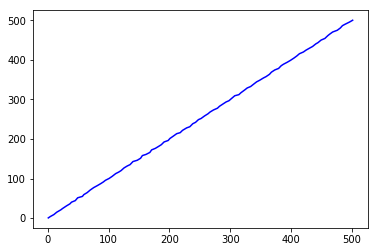

In [0]:
plt.plot(x_data, y_label, 'b')

In [0]:
m = tf.Variable(0.44)

In [0]:
b = tf.Variable(0.87)

In [0]:
error = 0

for x,y in zip(x_data, y_label):
  
  y_hat = m*x + b
  
  error += (y - y_hat)**2

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [0]:
train = optimizer.minimize(error)

In [0]:
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
  
  sess.run(init)
  
  training_steps = 10000
  
  for i in range(training_steps):
    sess.run(train)
    
  final_slope, final_intercept = sess.run([m,b])

In [0]:
x_test = np.linspace(-1,500,100)

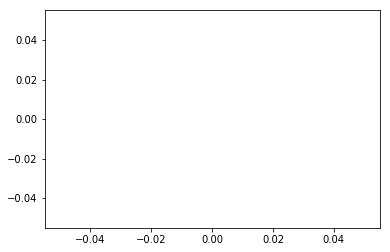

In [0]:
y_pred_plot = (final_slope * x_test ) + final_intercept

plt.plot(x_test, y_pred_plot, "r")
#plt.plot(x_data, y_label, "b")

#Linear Regression with huge data set

In [0]:
import pandas as pd

In [0]:
x_data = np.linspace(0.0,10.0, 1000000)

In [0]:
noise = np.random.randn(len(x_data))

In [0]:
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [0]:
noise

y = mx + b,  here m is 0.5 and b is 5. 

In [0]:
y_true = (0.5 * x_data) + 5 + noise

In [0]:
x_df = pd.DataFrame(data = x_data, columns=["X Data"])
y_df = pd.DataFrame(data = y_true, columns= ["Y"])

In [0]:
my_data = pd.concat([x_df,y_df], axis = 1)

In [0]:
my_data

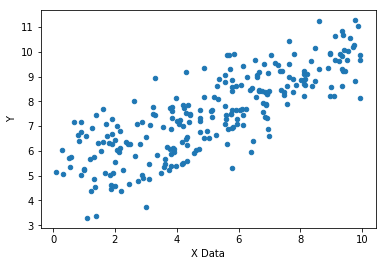

In [0]:
my_data.sample(n=250).plot(kind="scatter", x = 'X Data', y = 'Y')

In [0]:
batch_size = 8

In [0]:
m = tf.Variable(0.81)

In [0]:
b = tf.Variable(0.17)

In [0]:
xph = tf.placeholder(tf.float32, [batch_size])

In [0]:
yph = tf.placeholder(tf.float32, [batch_size])

In [0]:
y_model  = m * xph + b

In [0]:
error = tf.reduce_sum(tf.square(yph - y_model))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)


In [0]:
train = optimizer.minimize(error)

In [0]:
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
  
  sess.run(init)
  
  batches = 1000
  
  for i in range(batches):
    
    rand_ind = np.random.randint(len(x_data), size=batch_size)
    
    feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
    
    sess.run(train, feed_dict = feed)
    
  model_m, model_b = sess.run([m,b])

In [0]:
print(model_m)
print(model_b)

0.5284859
4.940842


In [0]:
y_hat = x_data * model_m + model_b

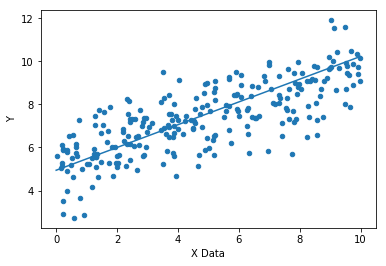

In [0]:
my_data.sample(250).plot(kind = 'scatter', x = 'X Data', y = 'Y')
plt.plot(x_data, y_hat)

#TensorFlow with Estimator API

1  Define a list of feature columns 

---


2  Create the Estimator Model

---


3  Create a Data input Function

---


4  Call train, evaluate and predict 




In [0]:
feat_cols = [tf.feature_column.numeric_column('x', shape=[1])]

In [0]:
feat_cols

In [0]:
estimator = tf.estimator.LinearRegressor(feature_columns = feat_cols)

W0725 17:22:57.273786 139861148710784 estimator.py:1811] Using temporary folder as model directory: /tmp/tmp18_7j7pl


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size = 0.3, random_state=101)

In [0]:
print (x_train.shape)

(700000,)


In [0]:
print (x_eval.shape)

(300000,)


In [0]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size =8, num_epochs = None, shuffle = True)

In [0]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size = 8, num_epochs = 1000, shuffle = False)

In [0]:
test_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval}, y_eval, batch_size = 8, num_epochs = 1000, shuffle = False)

In [0]:
estimator.train(input_fn= input_func, steps = 10000)


In [0]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps = 1000)

In [0]:
print(train_metrics)

{'average_loss': 1.0160408, 'label/mean': 7.529624, 'loss': 8.128326, 'prediction/mean': 7.5193267, 'global_step': 13000}


In [0]:
eval_metrics = estimator.evaluate(input_fn = test_input_func, steps = 1000)

In [0]:
print(eval_metrics)

{'average_loss': 1.002571, 'label/mean': 7.474285, 'loss': 8.020568, 'prediction/mean': 7.501214, 'global_step': 13000}


In [0]:
brand_new_data = np.linspace(0,10,10)
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data}, shuffle = False)

In [0]:
list(estimator.predict(input_fn = input_fn_predict))

[{'predictions': array([5.0123224], dtype=float32)},
 {'predictions': array([5.5691833], dtype=float32)},
 {'predictions': array([6.1260443], dtype=float32)},
 {'predictions': array([6.682905], dtype=float32)},
 {'predictions': array([7.2397666], dtype=float32)},
 {'predictions': array([7.7966275], dtype=float32)},
 {'predictions': array([8.353489], dtype=float32)},
 {'predictions': array([8.91035], dtype=float32)},
 {'predictions': array([9.467211], dtype=float32)},
 {'predictions': array([10.024072], dtype=float32)}]

In [0]:
predictions = []

for pred in estimator.predict(input_fn = input_fn_predict):
  
  predictions.append(pred['predictions'])

In [0]:
predictions

[array([5.0123224], dtype=float32),
 array([5.5691833], dtype=float32),
 array([6.1260443], dtype=float32),
 array([6.682905], dtype=float32),
 array([7.2397666], dtype=float32),
 array([7.7966275], dtype=float32),
 array([8.353489], dtype=float32),
 array([8.91035], dtype=float32),
 array([9.467211], dtype=float32),
 array([10.024072], dtype=float32)]

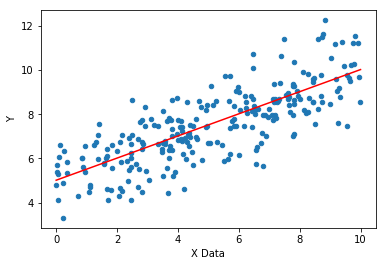

In [0]:
my_data.sample(n=250).plot(kind="scatter", x = 'X Data', y = "Y")
plt.plot(brand_new_data, predictions, 'r')

#Classification with Tensorflow Real Dataset

Pima Indians Diabetes Dataset, Tf.estimator API Categorical and Continuous Features, LinearClassifier and DNN Classifier


In [0]:
import pandas as pd

In [0]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [0]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [0]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [0]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [0]:
cols_to_norm

['Number_pregnant',
 'Glucose_concentration',
 'Blood_pressure',
 'Triceps',
 'Insulin',
 'BMI',
 'Pedigree']

In [0]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min() / (x.max() - x.min())))

In [0]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6.0,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1.0,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8.0,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1.0,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [0]:
import tensorflow as tf

In [0]:
num_preg = tf.feature_column.numeric_column("Number_pregnant")
plasma_gluc = tf.feature_column.numeric_column("Glucose_concentration")
dias_press = tf.feature_column.numeric_column("Blood_pressure")
tricep = tf.feature_column.numeric_column("Triceps")
insulin = tf.feature_column.numeric_column("Insulin")
bmi = tf.feature_column.numeric_column("BMI")
diabetes_pedigree = tf.feature_column.numeric_column("Pedigree")
age = tf.feature_column.numeric_column("Age")

In [0]:
print(type(num_preg))

<class 'tensorflow.python.feature_column.feature_column_v2.NumericColumn'>


In [0]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list("Group", ['A',"B","C","D"])




```
# This is formatted as code
```


assigned_group = tf.feature_column.categorical_column_with_hash_bucket("Group", hash_bucket_size=10)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [0]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, assigned_group, age_bucket]



```
# This is formatted as code
```

print((feat_cols))

In [0]:
x_data = diabetes.drop('Class', axis = 1)

In [0]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,6.0,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,1.0,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,8.0,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,1.0,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [0]:
labels = diabetes['Class']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)  

In [0]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [0]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

W0725 19:36:39.903706 139861148710784 estimator.py:1811] Using temporary folder as model directory: /tmp/tmpp49x5egp


In [0]:
model.train(input_fn=input_func, steps=1000)

In [0]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test,
                                                      batch_size=10,
                                                      num_epochs=1,
                                                      shuffle=False)

In [0]:
results = model.evaluate(input_fn=eval_input_func)

W0725 19:41:31.687772 139861148710784 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/metrics_impl.py:2027: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
W0725 19:41:32.128681 139861148710784 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0725 19:41:32.157534 139861148710784 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.


In [0]:
results

{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.79703707,
 'auc_precision_recall': 0.6462447,
 'average_loss': 0.53218305,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.122262,
 'precision': 0.6296296,
 'prediction/mean': 0.39988366,
 'recall': 0.6296296}

In [0]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, batch_size=10, num_epochs=1, shuffle=False)

In [0]:
predictions = model.predict(pred_input_func)

In [0]:
my_pred = list(predictions)

In [0]:
print(my_pred)

[{'logits': array([0.10710561], dtype=float32), 'logistic': array([0.5267508], dtype=float32), 'probabilities': array([0.47324914, 0.5267508 ], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([0.66128504], dtype=float32), 'logistic': array([0.659549], dtype=float32), 'probabilities': array([0.340451  , 0.65954894], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([-0.13363552], dtype=float32), 'logistic': array([0.46664077], dtype=float32), 'probabilities': array([0.5333592 , 0.46664074], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([-0.7962104], dtype=f

#Dense Neural Network Model for above given data

In [0]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

W0725 19:48:08.598169 139861148710784 estimator.py:1811] Using temporary folder as model directory: /tmp/tmp_2wr049x


In [0]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [0]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, embedded_group_col, age_bucket]

In [0]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,
                                                y=y_train,
                                                batch_size=10,
                                                num_epochs=1000,
                                                shuffle=True)

In [0]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,20,20,10,10], feature_columns=feat_cols, n_classes=2)

W0725 19:59:15.642955 139861148710784 estimator.py:1811] Using temporary folder as model directory: /tmp/tmps4cuikb4


In [0]:
dnn_model.train(input_fn=input_func, steps = 1000)

In [0]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,
                                                y=y_test,
                                                batch_size=10,
                                                num_epochs=1,
                                                shuffle=False)

In [0]:
result = dnn_model.evaluate(input_fn=eval_input_func)

W0725 19:59:27.320621 139861148710784 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0725 19:59:27.350245 139861148710784 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.


In [0]:
result

{'accuracy': 0.7532467,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8405762,
 'auc_precision_recall': 0.7226602,
 'average_loss': 0.48972017,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.713557,
 'precision': 0.61764705,
 'prediction/mean': 0.43656528,
 'recall': 0.7777778}

#TF Regression Exercise

In [0]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [0]:
cal_house_clean = pd.read_csv('cal_housing_clean.csv')

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
cal_house_clean.columns

Index(['housingMedianAge', 'totalRooms', 'totalBedrooms', 'population',
       'households', 'medianIncome', 'medianHouseValue'],
      dtype='object')

In [0]:
feature_column = ['housingMedianAge', 'totalRooms', 'totalBedrooms', 'population',
       'households', 'medianIncome']

In [0]:
x_data = cal_house_clean[feature_column]
labels = cal_house_clean['medianHouseValue']

In [0]:
labels.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: medianHouseValue, dtype: float64

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=100) 

In [0]:
X_train.head()


,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome
3472,26.0,4516.0,611.0,1714.0,581.0,9.2873
13593,39.0,1573.0,418.0,1258.0,359.0,1.4896
3507,33.0,1358.0,247.0,738.0,235.0,5.0947
6780,39.0,3856.0,867.0,1847.0,830.0,3.4559
8087,47.0,2347.0,437.0,1219.0,420.0,5.3096


In [0]:
y_train.head()

3472     431800.0
13593     69500.0
3507     210300.0
6780     364900.0
8087     209900.0
Name: medianHouseValue, dtype: float64

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(X_train))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [0]:
print(scaler.transform(X_train))

[[0.49019608 0.1146048  0.09438063 0.04795538 0.09508143 0.60601923]
 [0.74509804 0.03973645 0.06442099 0.03517475 0.05856226 0.06825423]
 [0.62745098 0.03426696 0.03787644 0.02060035 0.03816417 0.31687839]
 ...
 [0.03921569 0.46668702 0.3933561  0.23638555 0.38476723 0.35454683]
 [0.66666667 0.03620036 0.03880782 0.02102077 0.03701267 0.12974304]
 [0.92156863 0.04953064 0.05945359 0.03069032 0.06201678 0.28448573]]


In [0]:
X_train = scaler.transform(X_train)

In [0]:
X_test = scaler.transform(X_test)

In [0]:
X_train = pd.DataFrame(X_train, columns=feature_column,  index=y_train.index)
X_test = pd.DataFrame(X_test, columns=feature_column, index=y_test.index)

In [0]:
X_train.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome
3472,0.490196,0.114605,0.094381,0.047955,0.095081,0.606019
13593,0.745098,0.039736,0.064421,0.035175,0.058562,0.068254
3507,0.627451,0.034267,0.037876,0.020600,0.038164,0.316878
6780,0.745098,0.097815,0.134120,0.051683,0.136042,0.203859
8087,0.901961,0.059427,0.067370,0.034082,0.068597,0.331699


In [0]:
y_train.head()

3472     431800.0
13593     69500.0
3507     210300.0
6780     364900.0
8087     209900.0
Name: medianHouseValue, dtype: float64

In [0]:
X_test.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome
8151,0.686275,0.027983,0.028097,0.012360,0.028623,0.220907
53,1.000000,0.041186,0.070320,0.032484,0.065307,0.051558
3039,0.235294,0.114885,0.110214,0.060736,0.109886,0.298389
9484,0.352941,0.025821,0.031357,0.011800,0.024511,0.164370
9307,0.588235,0.166476,0.243403,0.082934,0.240336,0.164853


In [0]:
housing_med_age = tf.feature_column.numeric_column("housingMedianAge")
total_rooms = tf.feature_column.numeric_column("totalRooms")
total_bedrooms = tf.feature_column.numeric_column("totalBedrooms")
populations = tf.feature_column.numeric_column("population")
house_holds = tf.feature_column.numeric_column("households")
median_income = tf.feature_column.numeric_column("medianIncome")

In [0]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,
                                                y=y_train,
                                                batch_size=10,
                                                num_epochs = 1000,
                                                shuffle = True)

In [0]:
feat_cols = [housing_med_age, total_rooms, total_bedrooms, populations, house_holds, median_income]

In [0]:
model = tf.estimator.DNNRegressor(hidden_units= [6,6,6], feature_columns=feat_cols)

W0725 21:22:33.570083 139861148710784 estimator.py:1811] Using temporary folder as model directory: /tmp/tmp_v4r_rgc


In [0]:
model.train(input_fn=input_func, steps = 1000)

In [0]:
test_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,
                                                      y=y_test,
                                                      batch_size=10,
                                                      num_epochs=1,
                                                      shuffle=False)

In [0]:
result = model.evaluate(input_fn=test_input_func)

In [0]:
print(result)

{'average_loss': 14541388000.0, 'label/mean': 205064.9, 'loss': 145226250000.0, 'prediction/mean': 149691.34, 'global_step': 1000}


In [0]:
predict_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,
                                                      y=y_test,
                                                      batch_size=10,
                                                      num_epochs=1,
                                                      shuffle=False)

In [0]:
predict_result = model.predict(input_fn=predict_input_func)

In [0]:
predict_result = list(predict_result)

In [0]:
print(predict_result)

[{'predictions': array([146975.34], dtype=float32)}, {'predictions': array([164694.97], dtype=float32)}, {'predictions': array([142028.78], dtype=float32)}, {'predictions': array([119221.06], dtype=float32)}, {'predictions': array([180982.66], dtype=float32)}, {'predictions': array([141073.45], dtype=float32)}, {'predictions': array([164736.1], dtype=float32)}, {'predictions': array([150901.52], dtype=float32)}, {'predictions': array([132455.88], dtype=float32)}, {'predictions': array([211091.33], dtype=float32)}, {'predictions': array([137067.86], dtype=float32)}, {'predictions': array([204791.2], dtype=float32)}, {'predictions': array([150769.44], dtype=float32)}, {'predictions': array([144852.33], dtype=float32)}, {'predictions': array([161227.97], dtype=float32)}, {'predictions': array([118249.35], dtype=float32)}, {'predictions': array([162572.95], dtype=float32)}, {'predictions': array([177450.42], dtype=float32)}, {'predictions': array([139076.33], dtype=float32)}, {'predictions

In [0]:
final_pred = []

for pred in predict_result:
  final_pred.append(pred['predictions'])

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
mean_squared_error(y_test, final_pred)**0.5

120587.6314997912